In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.2 MB/s 
     |████████████████████████████████| 6.8 MB 39.7 MB/s 
     |████████████████████████████████| 2.0 MB 39.1 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 114 kB 49.1 MB/s 
     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.3 MB 51.6 MB/s 
     |████████████████████████████████| 1.7 MB 40.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.6 MB 38.1 MB/s 
     |████████████████████████████████| 167 kB 53.4 MB/s 
     |████████████████████████████████| 261 kB 46.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 303 kB 47.9 MB/s 
     |████████████████████████████████| 102 kB 9.5 MB/s 
     |████████████████████

In [ ]:
!gdown --id 1RHiFZyCYRR04-B7oQcm2I1oGLrt2jXUm

Downloading...
From: https://drive.google.com/uc?id=1RHiFZyCYRR04-B7oQcm2I1oGLrt2jXUm
To: /content/TotalRatio_TrainSet.csv
100% 5.69M/5.69M [00:00<00:00, 146MB/s]


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
import pandas as pd 
#dataset1 = pd.read_csv('/content/TotalRatio_TrainSet.csv')
#dataset = dataset1.drop(['Unnamed: 0', "parentId", "fontSize","fontStyle"], axis=1)

FileNotFoundError: ignored

In [ ]:
dataset

Ratio               fontFamily fontWeight
0       2.551640  DM_Shining_Star_Regular     normal
1      10.429448               Cordia_New     normal
2       0.369458               fonttintin     normal
3      31.120944          TH_Chakra_Petch       bold
4      37.726524               TH_Sarabun       bold
...          ...                      ...        ...
87351   9.891808              Angsana_New     normal
87352  23.887079              Angsana_New     normal
87353   5.562973               fonttintin       bold
87354   1.310044           TH_Charm_of_AU     normal
87355   0.000000          TH_Chakra_Petch     normal

[87356 rows x 3 columns]

In [ ]:
#check the shape of data
dataset.shape

(87356, 3)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (82988, 3)
Unseen Data For Predictions: (4368, 3)


In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
exp_clf101 = setup(data = data, target = 'fontWeight', session_id=123) 

Description               Value
0                               session_id                 123
1                                   Target          fontWeight
2                              Target Type              Binary
3                            Label Encoded  bold: 0, normal: 1
4                            Original Data          (82988, 3)
5                           Missing Values               False
6                         Numeric Features                   1
7                     Categorical Features                   1
8                         Ordinal Features               False
9                High Cardinality Features               False
10                 High Cardinality Method                None
11                   Transformed Train Set         (58091, 11)
12                    Transformed Test Set         (24897, 11)
13                      Shuffle Train-Test                True
14                     Stratify Train-Test               False
15                          Fold Generator     StratifiedKFold
16                             Fold Number                  10
17                                CPU Jobs                  -1
18                                 Use GPU               False
19                          Log Experiment               False
20                         Experiment Name    clf-default-name
21                                     USI                2594
22                         Imputation Type              simple
23          Iterative Imputation Iteration                None
24                         Numeric Imputer                mean
25      Iterative Imputation Numeric Model                None
26                     Categorical Imputer            constant
27  Iterative Imputation Categorical Model                None
28           Unknown Categoricals Handling      least_frequent
29                               Normalize               False
30                        Normalize Method                None
31                          Transformation               False
32                   Transformation Method                None
33                                     PCA               False
34                              PCA Method                None
35                          PCA Components                None
36                     Ignore Low Variance               False
37                     Combine Rare Levels               False
38                    Rare Level Threshold                None
39                         Numeric Binning               False
40                         Remove Outliers               False
41                      Outliers Threshold                None
42                Remove Multicollinearity               False
43             Multicollinearity Threshold                None
44             Remove Perfect Collinearity                True
45                              Clustering               False
46                    Clustering Iteration                None
47                     Polynomial Features               False
48                       Polynomial Degree                None
49                    Trignometry Features               False
50                    Polynomial Threshold                None
51                          Group Features               False
52                       Feature Selection               False
53                Feature Selection Method             classic
54            Features Selection Threshold                None
55                     Feature Interaction               False
56                           Feature Ratio               False
57                   Interaction Threshold                None
58                           Fix Imbalance               False
59                    Fix Imbalance Method               SMOTE

In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7838  0.8689  0.8087  0.7650   
lightgbm  Light Gradient Boosting Machine    0.7837  0.8691  0.7976  0.7704   
ada                  Ada Boost Classifier    0.7782  0.8640  0.8186  0.7521   
lr                    Logistic Regression    0.7769  0.8634  0.8477  0.7376   
svm                   SVM - Linear Kernel    0.7697  0.0000  0.7728  0.7659   
lda          Linear Discriminant Analysis    0.7642  0.8618  0.8963  0.7044   
ridge                    Ridge Classifier    0.7641  0.0000  0.8963  0.7044   
nb                            Naive Bayes    0.7563  0.8357  0.9005  0.6944   
knn                K Neighbors Classifier    0.7538  0.8247  0.7725  0.7386   
rf               Random Forest Classifier    0.7193  0.8076  0.7279  0.7089   
et                 Extra Trees Classifier    0.7169  0.7659  0.7194  0.7090   
dt               Decision Tree Classifier    0.7141  0.7141  0.7096  0.7091   
qda       Quadratic Discriminant Analysis    0.5668  0.6079  0.6133  0.5126   
dummy                    Dummy Classifier    0.5085  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.7862  0.5680  0.5689     3.595  
lightgbm  0.7837  0.5675  0.5679     0.394  
ada       0.7839  0.5570  0.5592     1.191  
lr        0.7888  0.5549  0.5609     0.249  
svm       0.7660  0.5393  0.5441     0.382  
lda       0.7888  0.5303  0.5503     0.139  
ridge     0.7888  0.5302  0.5502     0.058  
nb        0.7841  0.5149  0.5381     0.059  
knn       0.7551  0.5078  0.5084     0.800  
rf        0.7182  0.4387  0.4389     5.948  
et        0.7141  0.4338  0.4339     3.827  
dt        0.7093  0.4281  0.4282     0.184  
qda       0.5418  0.1351  0.1377     0.072  
dummy     0.0000  0.0000  0.0000     0.043

In [ ]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
models()

Name  ...  Turbo
ID                                         ...       
lr                    Logistic Regression  ...   True
knn                K Neighbors Classifier  ...   True
nb                            Naive Bayes  ...   True
dt               Decision Tree Classifier  ...   True
svm                   SVM - Linear Kernel  ...   True
rbfsvm                SVM - Radial Kernel  ...  False
gpc           Gaussian Process Classifier  ...  False
mlp                        MLP Classifier  ...  False
ridge                    Ridge Classifier  ...   True
rf               Random Forest Classifier  ...   True
qda       Quadratic Discriminant Analysis  ...   True
ada                  Ada Boost Classifier  ...   True
gbc          Gradient Boosting Classifier  ...   True
lda          Linear Discriminant Analysis  ...   True
et                 Extra Trees Classifier  ...   True
lightgbm  Light Gradient Boosting Machine  ...   True
dummy                    Dummy Classifier  ...   True

[17 rows x 3 columns]

In [ ]:
dt = create_model('gbc', fold = 13)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7874  0.8706  0.8075  0.7710  0.7888  0.5751  0.5757
1       0.7852  0.8752  0.8161  0.7633  0.7888  0.5707  0.5721
2       0.7984  0.8752  0.8311  0.7750  0.8021  0.5971  0.5987
3       0.7805  0.8656  0.7969  0.7659  0.7811  0.5611  0.5616
4       0.7794  0.8639  0.8056  0.7599  0.7821  0.5591  0.5600
5       0.7812  0.8704  0.7978  0.7664  0.7818  0.5625  0.5629
6       0.7718  0.8549  0.7842  0.7593  0.7715  0.5436  0.5439
7       0.7807  0.8649  0.8106  0.7594  0.7841  0.5617  0.5629
8       0.7898  0.8727  0.8051  0.7758  0.7902  0.5798  0.5802
9       0.7867  0.8722  0.8224  0.7623  0.7912  0.5738  0.5756
10      0.7786  0.8669  0.7996  0.7618  0.7803  0.5575  0.5582
11      0.7795  0.8633  0.7996  0.7631  0.7810  0.5593  0.5599
12      0.7941  0.8784  0.8192  0.7748  0.7964  0.5885  0.5894
Mean    0.7841  0.8688  0.8074  0.7660  0.7861  0.5685  0.5693
SD      0.0069  0.0061  0.0120  0.0059  0.0076  0.0138  0.0140

In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7855  0.8724  0.8200  0.7619  0.7899  0.5715  0.5731
1       0.7871  0.8735  0.8284  0.7600  0.7927  0.5746  0.5769
2       0.7896  0.8709  0.8224  0.7666  0.7935  0.5797  0.5812
3       0.7735  0.8612  0.7968  0.7556  0.7757  0.5472  0.5480
4       0.7779  0.8644  0.8004  0.7604  0.7799  0.5561  0.5569
5       0.7814  0.8623  0.8035  0.7639  0.7832  0.5630  0.5637
6       0.7867  0.8682  0.8165  0.7653  0.7900  0.5738  0.5750
7       0.7798  0.8650  0.8126  0.7572  0.7839  0.5601  0.5615
8       0.7824  0.8679  0.8119  0.7612  0.7858  0.5652  0.5664
9       0.7908  0.8761  0.8207  0.7692  0.7941  0.5820  0.5833
Mean    0.7835  0.8682  0.8133  0.7621  0.7869  0.5673  0.5686
SD      0.0052  0.0047  0.0098  0.0040  0.0059  0.0104  0.0107

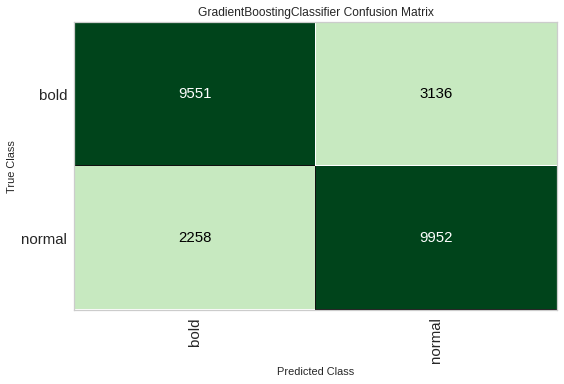

In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_dt)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Gradient Boosting Classifier    0.7833  0.8669  ...  0.7868  0.5671  0.5685

[1 rows x 8 columns]

Ratio  fontFamily_Angsana_New  ...   Label   Score
0       8.888888                     0.0  ...  normal  0.6607
1      33.927055                     0.0  ...    bold  0.8268
2      26.860687                     0.0  ...    bold  0.8224
3      36.300640                     0.0  ...    bold  0.8295
4       8.249158                     0.0  ...  normal  0.5606
...          ...                     ...  ...     ...     ...
24892  30.909090                     0.0  ...    bold  0.8219
24893  17.838541                     1.0  ...    bold  0.6340
24894   4.610226                     0.0  ...  normal  0.5578
24895  11.693548                     0.0  ...    bold  0.5659
24896  15.946502                     1.0  ...    bold  0.6155

[24897 rows x 14 columns]

In [ ]:
final_rf = finalize_model(tuned_dt)

In [ ]:
predict_model(final_rf)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Gradient Boosting Classifier    0.7861  0.8723  ...  0.7887  0.5725  0.5737

[1 rows x 8 columns]

Ratio  fontFamily_Angsana_New  ...   Label   Score
0       8.888888                     0.0  ...  normal  0.6754
1      33.927055                     0.0  ...    bold  0.8331
2      26.860687                     0.0  ...    bold  0.8220
3      36.300640                     0.0  ...    bold  0.8399
4       8.249158                     0.0  ...  normal  0.5399
...          ...                     ...  ...     ...     ...
24892  30.909090                     0.0  ...    bold  0.8392
24893  17.838541                     1.0  ...    bold  0.6538
24894   4.610226                     0.0  ...  normal  0.5759
24895  11.693548                     0.0  ...    bold  0.5531
24896  15.946502                     1.0  ...    bold  0.6135

[24897 rows x 14 columns]

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head(20)

Ratio               fontFamily fontWeight   Label   Score
0    3.134796           TH_Mali_Grade6       bold  normal  0.5212
1    0.522345               Kunlasatri       bold  normal  0.7222
2   23.813708               Kunlasatri       bold    bold  0.8242
3    1.857585     FC_Knomphing_Regular     normal  normal  0.7728
4   33.939394               fonttintin       bold    bold  0.8451
5    0.000000     FC_Knomphing_Regular     normal  normal  0.7611
6    4.173623               fonttintin       bold  normal  0.6226
7    0.869565           TH_Mali_Grade6     normal  normal  0.6955
8    9.368635           TH_Charm_of_AU     normal  normal  0.6952
9   12.173913              Angsana_New     normal  normal  0.5290
10  17.538461           TH_Mali_Grade6       bold    bold  0.8318
11   9.450549               Cordia_New     normal  normal  0.5318
12   2.602230              Angsana_New     normal  normal  0.7596
13  36.500579               fonttintin       bold    bold  0.8452
14   5.714286     FC_Knomphing_Regular     normal  normal  0.6544
15   6.925208          TH_Chakra_Petch       bold  normal  0.5646
16  13.910761           TH_Charm_of_AU     normal  normal  0.5621
17  15.397631          TH_Chakra_Petch     normal    bold  0.6419
18   2.400000          TH_Chakra_Petch     normal  normal  0.7208
19  14.730878  DM_Shining_Star_Regular     normal    bold  0.5037

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['fontWeight'], unseen_predictions['Label'], metric = 'Accuracy')

0.7814

In [ ]:
save_model(final_rf,'v2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='fontWeight', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             mi

In [ ]:
!gdown --id 1WxBbf0zAm_whiDccEq5JfTXdp62XE7uO

Downloading...
From: https://drive.google.com/uc?id=1WxBbf0zAm_whiDccEq5JfTXdp62XE7uO
To: /content/TotalRatio_TestSet.csv
100% 1.79M/1.79M [00:00<00:00, 187MB/s]


In [ ]:
!gdown --id 1FMob5eTOY7m67eRg2ysXwLJ3gDAW7aXw

Downloading...
From: https://drive.google.com/uc?id=1FMob5eTOY7m67eRg2ysXwLJ3gDAW7aXw
To: /content/task_predcit_italicFinal.csv
100% 764k/764k [00:00<00:00, 129MB/s]


In [ ]:
!unzip "/content/crop4.zip"

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
 extracting: crop/e36e7961.png       
 extracting: crop/f5fca3f6.png       
  inflating: crop/cbdc48b9.png       
 extracting: crop/d9e5d37d.png       
 extracting: crop/e3482c0b.png       
 extracting: crop/e07fafad.png       
  inflating: crop/0fc29ea2.png       
  inflating: crop/ead2327a.png       
 extracting: crop/8b1c7d60.png       
 extracting: crop/5886e51d.png       
 extracting: crop/81d0429c.png       
 extracting: crop/31bf1334.png       
 extracting: crop/c2fd9f07.png       
  inflating: crop/57c85c1c.png       
 extracting: crop/6eb379fe.png       
 extracting: crop/f8b44b16.png       
 extracting: crop/36997bb2.png       
 extracting: crop/82cb8111.png       
 extracting: crop/8bb2dea0.png       
 extracting: crop/627522f2.png       
 extracting: crop/0809e128.png       
 extracting: crop/16f7185b.png       
  inflating: crop/16fa3c9a.png       
  inflating: crop/4f82bfa1.png       
 extracting: crop/c3c87cc3.png 

#Train

In [ ]:
!gdown --id 1ftcnePMZhE11-6EFnW61FRJ1iJGcdft6
!gdown --id 1mxMwJlMpSI6Fznk5Xkoxxw54ZZCEAc6o

Downloading...
From: https://drive.google.com/uc?id=1ftcnePMZhE11-6EFnW61FRJ1iJGcdft6
To: /content/Machima4_Full1.csv
100% 11.4M/11.4M [00:00<00:00, 25.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mxMwJlMpSI6Fznk5Xkoxxw54ZZCEAc6o
To: /content/Final_hope_Ratio.csv
100% 1.86M/1.86M [00:00<00:00, 167MB/s]


In [ ]:
saved_final_rf = load_model('/content/v1')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
import pandas as pd
new = pd.read_csv('/content/Final_hope_Ratio.csv')
new

Unnamed: 0        Id      Ratio Predicted
0               0  c6e19298   2.985075    italic
1               1  b0d95f47  33.495856    italic
2               2  9936d84a   5.194805    italic
3               3  0f5d1238   7.758621    italic
4               4  eea84e41   1.170351    italic
...           ...       ...        ...       ...
47741       47741  24d3a3a3   4.219409    normal
47742       47742  dccdb8f6   0.000000    normal
47743       47743  13f1452c  12.972973    italic
47744       47744  2b7af402   0.000000    normal
47745       47745  c741449d  23.853210    normal

[47746 rows x 4 columns]

In [ ]:
ppong = pd.read_csv('/content/Machima4_Full1.csv')
x = ppong.iloc[::4]
x["Id"] = x["Id"].str.split('_', 1, expand=True)[0]
x

Id             Predicted
0       b68ab614       TH_Chakra_Petch
4       2d3a3417       TH_Chakra_Petch
8       b9b73e2d       TH_Chakra_Petch
12      1d8598b0       TH_Chakra_Petch
16      6626584d       TH_Chakra_Petch
...          ...                   ...
383968  21c94748  FC_Knomphing_Regular
383972  786f10d3            Kunlasatri
383976  da3d3427            Cordia_New
383980  990104af        TH_Mali_Grade6
383984  41af819d        TH_Mali_Grade6

[95997 rows x 2 columns]

In [ ]:
x = x.rename(columns={'Id': 'parentId'})

In [ ]:
test = pd.read_csv('/content/Final_hope_Ratio.csv')
test = test.rename(columns={'Predicted': 'fontStyle', 'Id': 'parentId'})
test

Unnamed: 0  parentId      Ratio fontStyle
0               0  c6e19298   2.985075    italic
1               1  b0d95f47  33.495856    italic
2               2  9936d84a   5.194805    italic
3               3  0f5d1238   7.758621    italic
4               4  eea84e41   1.170351    italic
...           ...       ...        ...       ...
47741       47741  24d3a3a3   4.219409    normal
47742       47742  dccdb8f6   0.000000    normal
47743       47743  13f1452c  12.972973    italic
47744       47744  2b7af402   0.000000    normal
47745       47745  c741449d  23.853210    normal

[47746 rows x 4 columns]

In [ ]:
csv_finish=pd.merge(x,test,on='parentId',how='left')
print(csv_finish.isna().sum())
csv_finish = csv_finish.drop(['Unnamed: 0'], axis = 1)
csv_finish = csv_finish.rename(columns={'Predicted': 'fontFamily'})
csv_finish

parentId          0
Predicted         0
Unnamed: 0    48251
Ratio         48251
fontStyle     48251
dtype: int64


parentId            fontFamily      Ratio fontStyle
0      b68ab614       TH_Chakra_Petch        NaN       NaN
1      2d3a3417       TH_Chakra_Petch        NaN       NaN
2      b9b73e2d       TH_Chakra_Petch        NaN       NaN
3      1d8598b0       TH_Chakra_Petch        NaN       NaN
4      6626584d       TH_Chakra_Petch        NaN       NaN
...         ...                   ...        ...       ...
95992  21c94748  FC_Knomphing_Regular   0.000000    italic
95993  786f10d3            Kunlasatri  23.958333    normal
95994  da3d3427            Cordia_New   6.360424    normal
95995  990104af        TH_Mali_Grade6   8.235294    italic
95996  41af819d        TH_Mali_Grade6   0.000000    italic

[95997 rows x 4 columns]

In [ ]:
ppong = pd.read_csv('/content/Machima4-submission.csv')
x = ppong.iloc[3::4]
x["Predicted"] = x["Predicted"].str.split('-', 1, expand=True)[0]
x["Id"] = x["Id"].str.split('_', 1, expand=True)[0]
x = x.rename(columns={'Id': 'parentId'})
x

parentId Predicted
3       b68ab614    normal
7       2d3a3417    normal
11      b9b73e2d    normal
15      1d8598b0    normal
19      6626584d    normal
...          ...       ...
383971  21c94748       NaN
383975  786f10d3       NaN
383979  da3d3427       NaN
383983  990104af       NaN
383987  41af819d       NaN

[95997 rows x 2 columns]

In [ ]:
csv_finish2=pd.merge(x,csv_finish,on='parentId',how='left')
print(csv_finish2.isna().sum())
csv_finish2 = csv_finish2.drop(['fontStyle'], axis = 1)
csv_finish2 = csv_finish2.rename(columns={'Predicted': 'fontStyle'})
csv_finish2

parentId          0
Predicted     47746
fontFamily    47746
Ratio         47746
fontSize      95997
fontStyle     95997
fontWeight    95997
dtype: int64


parentId fontStyle       fontFamily      Ratio  fontSize  fontWeight
0      b68ab614    normal  TH_Chakra_Petch  19.036202       NaN         NaN
1      2d3a3417    normal  TH_Chakra_Petch  13.108108       NaN         NaN
2      b9b73e2d    normal  TH_Chakra_Petch   4.188482       NaN         NaN
3      1d8598b0    normal  TH_Chakra_Petch   5.109890       NaN         NaN
4      6626584d    normal  TH_Chakra_Petch   2.821869       NaN         NaN
...         ...       ...              ...        ...       ...         ...
95992  21c94748       NaN              NaN        NaN       NaN         NaN
95993  786f10d3       NaN              NaN        NaN       NaN         NaN
95994  da3d3427       NaN              NaN        NaN       NaN         NaN
95995  990104af       NaN              NaN        NaN       NaN         NaN
95996  41af819d       NaN              NaN        NaN       NaN         NaN

[95997 rows x 6 columns]

In [ ]:
#csv_finish3 = csv_finish2.drop(['fontSize'], axis = 1)
data_unseen = csv_finish

In [ ]:
ppong = pd.read_csv('/content/Machima4-submission.csv')
ppong

Id            Predicted
0               b68ab614_name      TH_Chakra_Petch
1               b68ab614_file  TH Chakra Petch.ttf
2               b68ab614_size                 16px
3       b68ab614_style-weight        normal-normal
4               2d3a3417_name      TH_Chakra_Petch
...                       ...                  ...
383983  990104af_style-weight                  NaN
383984          41af819d_name                  NaN
383985          41af819d_file                  NaN
383986          41af819d_size                  NaN
383987  41af819d_style-weight                  NaN

[383988 rows x 2 columns]

In [ ]:
new_prediction = predict_model(saved_final_rf, data=csv_finish)

In [ ]:
#new_prediction = new_prediction.drop(['fontWeight'], axis = 1)
new_prediction

parentId            fontFamily      Ratio fontStyle   Label   Score
0      b68ab614       TH_Chakra_Petch        NaN       NaN    bold  0.5569
1      2d3a3417       TH_Chakra_Petch        NaN       NaN    bold  0.5569
2      b9b73e2d       TH_Chakra_Petch        NaN       NaN    bold  0.5569
3      1d8598b0       TH_Chakra_Petch        NaN       NaN    bold  0.5569
4      6626584d       TH_Chakra_Petch        NaN       NaN    bold  0.5569
...         ...                   ...        ...       ...     ...     ...
95992  21c94748  FC_Knomphing_Regular   0.000000    italic  normal  0.7376
95993  786f10d3            Kunlasatri  23.958333    normal    bold  0.8005
95994  da3d3427            Cordia_New   6.360424    normal  normal  0.6124
95995  990104af        TH_Mali_Grade6   8.235294    italic    bold  0.6717
95996  41af819d        TH_Mali_Grade6   0.000000    italic  normal  0.7199

[95997 rows x 6 columns]

In [ ]:
new_prediction['mergeStyle'] = new_prediction['fontStyle'] + "-" + new_prediction['Label']
new_prediction

parentId            fontFamily      Ratio fontStyle   Label   Score  \
0      b68ab614       TH_Chakra_Petch        NaN       NaN    bold  0.5569   
1      2d3a3417       TH_Chakra_Petch        NaN       NaN    bold  0.5569   
2      b9b73e2d       TH_Chakra_Petch        NaN       NaN    bold  0.5569   
3      1d8598b0       TH_Chakra_Petch        NaN       NaN    bold  0.5569   
4      6626584d       TH_Chakra_Petch        NaN       NaN    bold  0.5569   
...         ...                   ...        ...       ...     ...     ...   
95992  21c94748  FC_Knomphing_Regular   0.000000    italic  normal  0.7376   
95993  786f10d3            Kunlasatri  23.958333    normal    bold  0.8005   
95994  da3d3427            Cordia_New   6.360424    normal  normal  0.6124   
95995  990104af        TH_Mali_Grade6   8.235294    italic    bold  0.6717   
95996  41af819d        TH_Mali_Grade6   0.000000    italic  normal  0.7199   

          mergeStyle  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
95992  italic-normal  
95993    normal-bold  
95994  normal-normal  
95995    italic-bold  
95996  italic-normal  

[95997 rows x 7 columns]

In [ ]:
new_prediction.to_csv('merry.csv')

In [ ]:
#new_prediction = new_prediction.rename(columns={'parentId': 'Id'})
new_prediction.head(101)

parentId               fontFamily       Ratio   Label   Score
0    b68ab614          TH_Chakra_Petch   19.036202    bold  0.6998
1    2d3a3417          TH_Chakra_Petch   13.108108    bold  0.5738
2    b9b73e2d          TH_Chakra_Petch    4.188482  normal  0.6977
3    1d8598b0          TH_Chakra_Petch    5.109890  normal  0.6616
4    6626584d          TH_Chakra_Petch    2.821869  normal  0.7216
..        ...                      ...         ...     ...     ...
96   77923b03          TH_Chakra_Petch   95.276872    bold  0.7702
97   e7820c7f     FC_Knomphing_Regular    4.629630  normal  0.6977
98   19f4944f          TH_Chakra_Petch    1.570681  normal  0.7316
99   96c4f14a  DM_Shining_Star_Regular   99.420625    bold  0.7355
100  cfd80cbe               fonttintin  100.000000    bold  0.6984

[101 rows x 5 columns]

In [ ]:
ppong = pd.read_csv('/content/Machima4_Full1.csv')
ppong.head(102)

Id            Predicted
0            b68ab614_name      TH_Chakra_Petch
1            b68ab614_file  TH Chakra Petch.ttf
2            b68ab614_size                 24px
3    b68ab614_style-weight        normal-normal
4            2d3a3417_name      TH_Chakra_Petch
5            2d3a3417_file  TH Chakra Petch.ttf
6            2d3a3417_size                 24px
7    2d3a3417_style-weight          normal-bold
8            b9b73e2d_name      TH_Chakra_Petch
9            b9b73e2d_file  TH Chakra Petch.ttf
10           b9b73e2d_size                 20px
11   b9b73e2d_style-weight        normal-normal
12           1d8598b0_name      TH_Chakra_Petch
13           1d8598b0_file  TH Chakra Petch.ttf
14           1d8598b0_size                 16px
15   1d8598b0_style-weight          normal-bold
16           6626584d_name      TH_Chakra_Petch
17           6626584d_file  TH Chakra Petch.ttf
18           6626584d_size                 20px
19   6626584d_style-weight        normal-normal
20           b56c4dd3_name      TH_Chakra_Petch
21           b56c4dd3_file  TH Chakra Petch.ttf
22           b56c4dd3_size                 16px
23   b56c4dd3_style-weight          normal-bold
24           5b1e8c5f_name      TH_Chakra_Petch
25           5b1e8c5f_file  TH Chakra Petch.ttf
26           5b1e8c5f_size                 16px
27   5b1e8c5f_style-weight          normal-bold
28           11a9de28_name      TH_Chakra_Petch
29           11a9de28_file  TH Chakra Petch.ttf
30           11a9de28_size                 20px
31   11a9de28_style-weight          normal-bold
32           f121f1aa_name      TH_Chakra_Petch
33           f121f1aa_file  TH Chakra Petch.ttf
34           f121f1aa_size                 20px
35   f121f1aa_style-weight        normal-normal
36           bf397c29_name      TH_Chakra_Petch
37           bf397c29_file  TH Chakra Petch.ttf
38           bf397c29_size                 20px
39   bf397c29_style-weight          normal-bold
40           6b64ce56_name      TH_Chakra_Petch
41           6b64ce56_file  TH Chakra Petch.ttf
42           6b64ce56_size                 16px
43   6b64ce56_style-weight        normal-normal
44           7fb103fd_name      TH_Chakra_Petch
45           7fb103fd_file  TH Chakra Petch.ttf
46           7fb103fd_size                 16px
47   7fb103fd_style-weight          normal-bold
48           af3134e6_name      TH_Chakra_Petch
49           af3134e6_file  TH Chakra Petch.ttf
50           af3134e6_size                 16px
51   af3134e6_style-weight        normal-normal
52           65ced0d2_name      TH_Chakra_Petch
53           65ced0d2_file  TH Chakra Petch.ttf
54           65ced0d2_size                 16px
55   65ced0d2_style-weight        normal-normal
56           5c731163_name      TH_Chakra_Petch
57           5c731163_file  TH Chakra Petch.ttf
58           5c731163_size                 22px
59   5c731163_style-weight        normal-normal
60           a680609d_name      TH_Chakra_Petch
61           a680609d_file  TH Chakra Petch.ttf
62           a680609d_size                 24px
63   a680609d_style-weight          normal-bold
64           75d383be_name      TH_Chakra_Petch
65           75d383be_file  TH Chakra Petch.ttf
66           75d383be_size                 16px
67   75d383be_style-weight          normal-bold
68           33c4449e_name           fonttintin
69           33c4449e_file       fonttintin.ttf
70           33c4449e_size                 16px
71   33c4449e_style-weight        italic-normal
72           c4047fcc_name           fonttintin
73           c4047fcc_file       fonttintin.ttf
74           c4047fcc_size                 24px
75   c4047fcc_style-weight        italic-normal
76           bdfe98ac_name           fonttintin
77           bdfe98ac_file       fonttintin.ttf
78           bdfe98ac_size                 24px
79   bdfe98ac_style-weight        italic-normal
80           745300c1_name           fonttintin
81           745300c1_file       fonttintin.ttf
82           745300c1_size              

In [ ]:
df2 = new_prediction.rename(columns={'parentId': 'Id'})

In [ ]:
ppong = pd.read_csv('/content/Machima4_Full1.csv')
df = df2
ppong['Ids'] = ''
for i in ppong.index[:]:
  if ppong['Id'][i].split("_")[-1] == 'style-weight':
    ppong['Ids'][i] =  ppong['Id'][i].split("_")[0]
    my_prediction = df[df['Id']==ppong['Ids'][i]].values[0][-1]
    print(my_prediction)
    #print(df[df['Id']==ppong['Ids'][i]].values)
    #my_prediction = new_prediction.loc[ppong['Ids'][i].isin(new_prediction['Id'])]
    try:
      ppong['Predicted'][i] = my_prediction
    except:
      print(ppong['Ids'][i])
ppong

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
normal-normal
italic-normal
italic-bold
normal-bold
italic-normal
normal-bold
italic-bold
italic-bold
italic-bold
italic-bold
normal-bold
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-normal
italic-normal
normal-normal
normal-bold
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-normal
normal-bold
normal-bold
normal-bold
normal-bold
italic-bold
normal-bold
italic-bold
italic-bold
italic-bold
italic-bold
italic-bold
normal-bold
italic-bold
normal-bold
normal-bold
normal-bold
normal-bold
normal-bold
italic-normal
italic-bold
italic-normal
italic-bold
italic-bold
italic-bold
italic-normal
italic-bold
normal-normal
normal-normal
italic-normal
italic-normal
italic-normal
italic-normal
normal-normal
italic-normal
italic-normal
italic-bold
italic-no

Id            Predicted       Ids
0               b68ab614_name      TH_Chakra_Petch          
1               b68ab614_file  TH Chakra Petch.ttf          
2               b68ab614_size                 24px          
3       b68ab614_style-weight                  NaN  b68ab614
4               2d3a3417_name      TH_Chakra_Petch          
...                       ...                  ...       ...
383983  990104af_style-weight          italic-bold  990104af
383984          41af819d_name       TH_Mali_Grade6          
383985          41af819d_file   TH Mali Grade6.ttf          
383986          41af819d_size                 16px          
383987  41af819d_style-weight        italic-normal  41af819d

[383988 rows x 3 columns]

In [ ]:
hope = ppong.drop(['Ids'], axis = 1)
hope.to_csv('lastHope3.csv', index=False)

In [ ]:
hope2 = hope
hope2

Id            Predicted
0               b68ab614_name      TH_Chakra_Petch
1               b68ab614_file  TH Chakra Petch.ttf
2               b68ab614_size                 16px
3       b68ab614_style-weight          normal-bold
4               2d3a3417_name      TH_Chakra_Petch
...                       ...                  ...
383983  990104af_style-weight                  NaN
383984          41af819d_name                  NaN
383985          41af819d_file                  NaN
383986          41af819d_size                  NaN
383987  41af819d_style-weight                  NaN

[383988 rows x 2 columns]

In [ ]:
ppong

Id            Predicted       Ids
0               b68ab614_name      TH_Chakra_Petch          
1               b68ab614_file  TH Chakra Petch.ttf          
2               b68ab614_size                 16px          
3       b68ab614_style-weight          normal-bold  b68ab614
4               2d3a3417_name      TH_Chakra_Petch          
...                       ...                  ...       ...
383983  990104af_style-weight                  NaN  990104af
383984          41af819d_name                  NaN          
383985          41af819d_file                  NaN          
383986          41af819d_size                  NaN          
383987  41af819d_style-weight                  NaN  41af819d

[383988 rows x 3 columns]

In [ ]:
new_prediction

In [ ]:
answer = new_prediction.drop()

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')